In [2]:
import os
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from parse import *
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RandomForest
import random
from sklearn import linear_model
from datetime import datetime
import gc

pd.set_option("display.max_columns", 2000)


In [3]:
CHUNKSIZE = 100000

TRAIN_DATE        = "train_date.csv"
TRAIN_NUMERIC     = "train_numeric.csv"
TRAIN_CATEGORICAL = "train_categorical.csv"
TEST_DATE         = "test_date.csv"
TEST_NUMERIC      = "test_numeric.csv"
TEST_CATEGORICAL  = "test_categorical.csv"

SEED = 0
CHUNKSIZE = 50000
NROWS = 1200000

ID_COLUMN = 'Id'
TARGET_COLUMN = 'Response'
 

In [6]:
CHUNK_SIZE = 10000

start = datetime.now()

reader_num = pd.read_csv("../output/df_id_response.csv",chunksize=CHUNK_SIZE, dtype=np.float32, index_col='Id')
reader_cat = pd.read_csv("../output/train_cat_top5.csv",chunksize=CHUNK_SIZE, dtype=np.float32, index_col='Id')
reader_date = pd.read_csv("../output/train_date_top5.csv",chunksize=CHUNK_SIZE, dtype=np.float32, index_col='Id')

#分割して読み込み
loop = 0
cnt_0 = 0
cnt_1 = 0
for df_chunk_date in reader_date:
    df_chunk_cat = reader_cat.get_chunk(CHUNK_SIZE)
    df_chunk_num = reader_num.get_chunk(CHUNK_SIZE)
    
    df_chunk = pd.merge(on="Id", left=df_chunk_date, right=df_chunk_cat)
    df_chunk = pd.merge(on="Id", left=df_chunk, right=df_chunk_num)
    
    df_0 = df_chunk[df_chunk['Response'] == 0]
    df_1 = df_chunk[df_chunk['Response'] == 1]
    
    if loop == 0:
        df = pd.concat([df_0, df_1])
    else:
        df = pd.concat([df, df_0, df_1])
    
    print("loop : {} / Rows = {}".format(loop, len(df.index)))

    loop = loop + 1
    
print("0:{}, 1:{}".format(cnt_0, cnt_1))
print("{} -> {}".format(start, datetime.now()))
print("Memory:{}".format(df.memory_usage(index=True).sum()))

loop : 0 / Rows = 10000
loop : 1 / Rows = 20000
loop : 2 / Rows = 30000
loop : 3 / Rows = 40000
loop : 4 / Rows = 50000
loop : 5 / Rows = 60000
loop : 6 / Rows = 70000
loop : 7 / Rows = 80000
loop : 8 / Rows = 90000
loop : 9 / Rows = 100000
loop : 10 / Rows = 110000
loop : 11 / Rows = 120000
loop : 12 / Rows = 130000
loop : 13 / Rows = 140000
loop : 14 / Rows = 150000
loop : 15 / Rows = 160000
loop : 16 / Rows = 170000
loop : 17 / Rows = 180000
loop : 18 / Rows = 190000
loop : 19 / Rows = 200000
loop : 20 / Rows = 210000
loop : 21 / Rows = 220000
loop : 22 / Rows = 230000
loop : 23 / Rows = 240000
loop : 24 / Rows = 250000
loop : 25 / Rows = 260000
loop : 26 / Rows = 270000
loop : 27 / Rows = 280000
loop : 28 / Rows = 290000
loop : 29 / Rows = 300000
loop : 30 / Rows = 310000
loop : 31 / Rows = 320000
loop : 32 / Rows = 330000
loop : 33 / Rows = 340000
loop : 34 / Rows = 350000
loop : 35 / Rows = 360000
loop : 36 / Rows = 370000
loop : 37 / Rows = 380000
loop : 38 / Rows = 390000
loop 

In [7]:
df.head()

,L1_S25_D2713,L1_S25_D2518,L1_S25_D2505,L1_S25_D2497,L1_S24_D1368,L1_S24_F1525,L1_S25_F1852,L1_S25_F2779,L3_S32_F3851,L3_S32_F3854,Response
Id,,,,,,,,,,,
4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
6.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
11.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.model_selection import train_test_split

start = datetime.now()

## 教師データと訓練データに分離
y = df['Response']
X = df.drop('Response', axis=1)

## テストセットと訓練セットに分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.head())
print(y_train.head())

print(X_test.head())
print(y_test.head())

print("{} -> {}".format(start, datetime.now()))

           L1_S25_D2713  L1_S25_D2518  L1_S25_D2505  L1_S25_D2497  \
Id                                                                  
2335098.0           NaN           NaN           NaN           NaN   
516059.0            NaN           NaN           NaN           NaN   
1000204.0           NaN           NaN           NaN           NaN   
400008.0            NaN           NaN           NaN           NaN   
1555368.0           NaN           NaN           NaN           NaN   

           L1_S24_D1368  L1_S24_F1525  L1_S25_F1852  L1_S25_F2779  \
Id                                                                  
2335098.0           NaN           0.0           0.0           0.0   
516059.0            0.0           0.0           0.0           0.0   
1000204.0           NaN           0.0           0.0           0.0   
400008.0            NaN           0.0           0.0           0.0   
1555368.0           NaN           0.0           0.0           0.0   

           L3_S32_F3851  L3_S32_

In [9]:
## 学習
import lightgbm as lgb
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import GridSearchCV

start = datetime.now()

lgbm = lgb.LGBMClassifier(random_state=1,n_jobs=-1,verbose=2)
parameters = {'max_depth':[3,4,5], 'num_leaves':[8,16,32]}
mcc_scorer = make_scorer(matthews_corrcoef)
clf = GridSearchCV(lgbm, param_grid=parameters, scoring=mcc_scorer,verbose=2)
clf.fit(X_train, y_train.values.ravel())

print(clf.best_score_)
print(clf.best_params_)

delta = int((datetime.now() - start).total_seconds())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=3, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=   1.1s
[CV] max_depth=3, num_leaves=8 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=   1.1s
[CV] max_depth=3, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=   1.1s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=   1.1s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=   1.1s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=   1.2s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=   1.1s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=   1.3s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=   1.2s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=   1.1s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=   1.2s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=   1.2s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=   1.2s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=   1.3s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=   1.3s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=   1.2s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=   1.2s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=   1.2s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=   1.2s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=   1.2s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=   1.3s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=   1.3s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=   1.4s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=   1.3s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=   1.3s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=   1.4s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=   1.4s


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   59.7s finished


0.03634726099175962
{'max_depth': 4, 'num_leaves': 16}
>>Execution Time -> 1:01


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


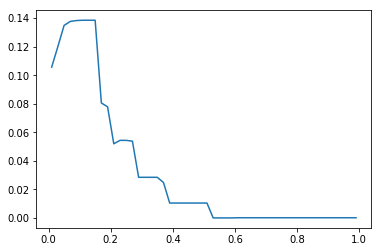

best threshold = 0.11
best mcc = 0.1385178709307173
>>Execution Time -> 0:13


In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.now()

thresholds = np.linspace(0.01,0.99,50)
y_pred = clf.best_estimator_.predict_proba(X_test.values)[:,1]
mcc = np.array([metrics.matthews_corrcoef(y_test.values, y_pred>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
plt.show()

best_thr = thresholds[mcc.argmax()]
print("best threshold = {}".format(best_thr))
print("best mcc = {}".format(mcc.max()))

delta = int((datetime.now() - start).total_seconds())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

In [12]:
# 特徴量の表示
for i in range(0, X_train.shape[1]):
    print("{}:{}".format(X_train.columns[i], clf.best_estimator_.feature_importances_[i]))


L1_S25_D2713:116
L1_S25_D2518:188
L1_S25_D2505:131
L1_S25_D2497:18
L1_S24_D1368:69
L1_S24_F1525:79
L1_S25_F1852:179
L1_S25_F2779:68
L3_S32_F3851:47
L3_S32_F3854:273


# 全訓練データを用いて再学習

In [13]:
start = datetime.now()
clf_all = lgb.LGBMClassifier(random_state=1,n_jobs=-1,verbose=2, max_depth=clf.best_params_['max_depth'], num_leaves=clf.best_params_['num_leaves'])
clf_all.fit(X, y.values.ravel())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

>>Execution Time -> 0:13


# テストデータを用いて予測

In [15]:
start = datetime.now()

reader_test_cat = pd.read_csv("../output/test_cat_top5.csv",chunksize=CHUNK_SIZE, dtype=np.float32)
reader_test_date = pd.read_csv("../output/test_date_top5.csv",chunksize=CHUNK_SIZE, dtype=np.float32)


#分割して読み込み
loop = 0
for df_chunk_test_date in reader_test_date:
        
    df_test_id_chunk = df_chunk_test_date['Id']

    df_chunk_test_cat = reader_test_cat.get_chunk(CHUNK_SIZE)
    
    df_features_chunk = pd.merge(on="Id", left=df_chunk_test_date, right=df_chunk_test_cat)
    
    df_features_chunk = df_features_chunk.drop('Id', axis=1)
    
    ##予測
    ary_test_chunk_pred = clf.predict_proba(df_features_chunk.values)[:,1]
    y_submit = ary_test_chunk_pred > best_thr

    df_test_chunk_pred = pd.DataFrame({'Id':df_test_id_chunk.values, 'Response':y_submit})
    
    if loop == 0:
        df_test_pred = df_test_chunk_pred
    else:
        df_test_pred = pd.concat([df_test_pred, df_test_chunk_pred])
    
    print("loop : {} / Rows = {}".format(loop, len(df_test_pred.index)))
    
    loop = loop + 1



loop : 0 / Rows = 10000
loop : 1 / Rows = 20000
loop : 2 / Rows = 30000
loop : 3 / Rows = 40000
loop : 4 / Rows = 50000
loop : 5 / Rows = 60000
loop : 6 / Rows = 70000
loop : 7 / Rows = 80000
loop : 8 / Rows = 90000
loop : 9 / Rows = 100000
loop : 10 / Rows = 110000
loop : 11 / Rows = 120000
loop : 12 / Rows = 130000
loop : 13 / Rows = 140000
loop : 14 / Rows = 150000
loop : 15 / Rows = 160000
loop : 16 / Rows = 170000
loop : 17 / Rows = 180000
loop : 18 / Rows = 190000
loop : 19 / Rows = 200000
loop : 20 / Rows = 210000
loop : 21 / Rows = 220000
loop : 22 / Rows = 230000
loop : 23 / Rows = 240000
loop : 24 / Rows = 250000
loop : 25 / Rows = 260000
loop : 26 / Rows = 270000
loop : 27 / Rows = 280000
loop : 28 / Rows = 290000
loop : 29 / Rows = 300000
loop : 30 / Rows = 310000
loop : 31 / Rows = 320000
loop : 32 / Rows = 330000
loop : 33 / Rows = 340000
loop : 34 / Rows = 350000
loop : 35 / Rows = 360000
loop : 36 / Rows = 370000
loop : 37 / Rows = 380000
loop : 38 / Rows = 390000
loop 

In [16]:
df_test_pred['Id'] = df_test_pred.Id.astype('int')    
df_test_pred['Response'] = df_test_pred.Response.astype('bool')
df_test_pred.head()

,Id,Response
0,1,False
1,2,False
2,3,False
3,5,False
4,8,False


In [17]:
##CSV出力
y_submit = df_test_pred
type(y_submit)
y_submit.to_csv("submit_last_without_num.csv", columns=['Id', 'Response'], index=False)

In [44]:
y_submit.Response.sum()

2780

In [41]:
y_submit.head()

,Id,Response
0,1.0,False
1,2.0,False
2,3.0,False
3,5.0,False
4,8.0,False
